In [1]:
from delaunay import *
from visualizer.main import Visualizer
from random import uniform

In [16]:
# def gen_point(point1 : Point, point2 : Point) -> Point:
#     new = Point(uniform(0,100),uniform(0,100))
#     while orientation(point1,point2,new) == 1: 
#         new = Point(uniform(0,100),uniform(0,100))
#     return new



# p1, p2 = Point(10,10), Point(15,45)
# new = gen_point(p1,p2)
# vis = Visualizer()
# vis.add_point([get(p1),get(p2),get(new)])
# vis.show()

def gen_points(n : int) -> list[Point]:
    list = []
    for i in range(n):
        list.append(Point(uniform(0,100),uniform(0,100)))
    return list

def make_subscritable_points(list):
    list2 = []
    for point in list:
        list2.append((point.x,point.y))
    return list2



def main_test(n : int):
    points = gen_points(n)
    tri = DelaunayTriangulation(points)
    for i in range(n):
        curr = tri.find_triangle(points[i])
        neighbourhood, hull, _ = tri.find_neighbourhood(points[i],curr,set(),neighbourhood=[], hull=[])
        tri.delete_neighbourhood(neighbourhood)
        tri.rebuild_neighbourhood(points[i], hull)
    tri.clean_up()
        
    return tri, points

def visualise_tri(tri : DelaunayTriangulation):
    vis = Visualizer()
    edges = []
    for edge in list(tri.neighbours.edges.keys()):
        edges.append((edge.p1.get(),edge.p2.get()))
    vis.add_line_segment(edges)
    return vis

# tri, points = main_test(3)
# vis = visualise_tri(tri)
# vis.add_point(make_subscritable_points(points))
# vis.show()



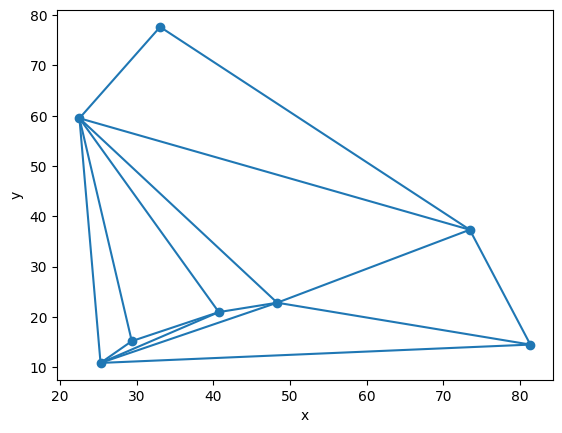

In [18]:
def make_subscritable_points(list):
    list2 = []
    for point in list:
        list2.append((point.x,point.y))
    return list2

points = [Point(1,7),Point(6,8),Point(4,2)]
tri, points = main_test(8)

vis = visualise_tri(tri)
vis.add_point(make_subscritable_points(points))
vis.show()


In [ ]:
print(Point(1,7).is_in_circumcircle_of(Triangle(Point(-8.030899869919436, -7.030899869919436), Point(15.030899869919436, -7.030899869919436), Point(15.030899869919436, 17.030899869919438))))

True


In [14]:
points = [Point(2,5),Point(7,2),Point(4,6)]

t = Triangle(points[0],points[1],points[2])
vis = Visualizer()
vis.add_polygon(make_subscritable_points(points),fill=False)
point = t.find_incenter()
vis.add_point((point))
vis.show()

AttributeError: 'Triangle' object has no attribute 'find_incenter'